In [ ]:
from scipy.integrate import odeint
from time import time
import numpy as np
import copy as cp
import pylab as plb
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#random variation of parameters
def randpar(par,var):
    '''This function adds gaussian noise to parameters stored in a dictionary. 
    var is the std of the gaussian distribution (1 = 100% of the not noisy value).'''
    flag = 0
    while flag == 0:
        temp = cp.deepcopy(par)
        for key in par.keys():
            temp[key]=par[key]*(1+var*plb.randn())
            #if temp[key] < 0:
            #    flag = 0
            #    break
            #else:
                #flag =1
            if temp[key] < 0:
                temp[key] = 0
        flag = 1            
    return temp  

In [ ]:
def Lorenz(x,t,p):
    der0 = p['s']*(x[1] - x[0])
    der1 = x[0]*(p['r']-x[2]) - x[1]
    der2 = x[0]*x[1] - p['b']*x[2]
    return [der0,der1,der2]

Lorenzpar= dict(s= 10., b =8./3, r = 28)

//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


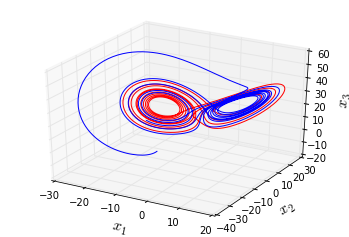

In [ ]:
t0 = 0
tend =10
Nt = 3000
dt = (tend-t0)/float(Nt)
N = 2
v = 0.0
time = np.linspace(t0,tend,Nt)
traj = np.full((N,Nt,3),-3.)
for i in range(N):
    # add noise to the position of the fixed point
    rlvpar = randpar(Lorenzpar,v)
    #
    yinit = 30*(plb.rand(3)-0.5)
    traj[i,:,:] = odeint(Lorenz,yinit,time,args = (rlvpar,))

#mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
clist = ['r','b']
for i in range(N):
    ax.plot(traj[i,:,0], traj[i,:,1], traj[i,:,2],clist[i])
#fixed point 1    
#ax.plot([sqrt(Lorenzpar['b']*(Lorenzpar['r']-1))],[sqrt(Lorenzpar['b']*(Lorenzpar['r']-1))],[Lorenzpar['r']-1],'o')    
#fixed point 2
#ax.plot([-sqrt(Lorenzpar['b']*(Lorenzpar['r']-1))],[-sqrt(Lorenzpar['b']*(Lorenzpar['r']-1))],[Lorenzpar['r']-1],'o')    
#fixed point 3
#ax.plot([0],[0],[0],'o')    
ax.legend()
ax.set_xlabel('\n $x_1$',size='15')
ax.set_ylabel('\n $x_2$',size='15')
ax.set_zlabel('\n $x_3$',size='15')
plt.show()
#fig.savefig("ofd/3d_traj.pdf") 

In [ ]:
Lia

array([-20.74651551, -31.09432086,  -6.75564062])

In [ ]:
traj[0,0,0], traj[0,0,1], traj[0,0,2]

(-7.5713225714174257, 11.35790722258651, 9.5082052253453533)

In [ ]:
traj[1,0,0], traj[1,0,1], traj[1,0,2]

(-12.17158329035226, -5.2267000692077179, -11.603309250360061)